# Probability: Mathematical/Theoretical and Computational Approaches

*Dan L. Nicolae* 

We'll illustrate the concepts we want to introduce in this chapter with a classic probability problem called **the birthday problem**. Suppose you and a friend go to a party where there are 30 people, (all unknown to both of you), and your friend wants to bet you that there are two people at that party who share their birthday. Would you be willing to take that bet? 

Your willingness to take the bet should be related to the chance of winning the bet. What do you think is more likely to happen: Finding a pair with shared birthdays? Or having 30 distinct birthdays?

We will answer this question using the language of probability: we will calculate the probability of the event that at least two people share the birthdays in a group of 30 people. The next section will introduce the rules we need for deriving this probability.

Let's start with a simpler problem: What is the probability that two people share their birthday. Can you justify the following result?

$$P(\mbox{two random people have the same birthday}) ~=~ \frac{1}{365}$$

Think about the assumptions you implicitly or explicitly made in your justification. 

We will show in the next section that, given a number of people, **n** (with $2\leq n\leq 365$), the probability, $P_n$, that at least two share a birthday is given by:

$$P_n ~=~ 1-\frac{365\times364\times ...\times (365-n+1)}{365^n}$$

which can also be written as:

$$P_n ~=~ 1-\frac{365}{365}\times\frac{364}{365}\times\frac{363}{365}\times ...\times \frac{(365-n+1)}{365}$$

The asssumptions used for this calculation are:

* There are 365 days in a year;

* All days are equally likely to be a birthday;

* Subjects' birthdays are independent of each other (for example, no twins in the room).

The function below calculates these probabilities. 

In [1]:
def birthday_prob(n):
    """Calculate the probability that at least 2 people 
       out of `n` have the same birthday.
    
    """
    prob = 1
    
    for index in range(n):
        prob *= (365 - index) / 365
    
    return round(1 - prob, 4)

We can use this function to calculate the probability for the above scenario (a group of 30 random people):

In [2]:
birthday_prob(30)

0.7063

The probability is close to 0.7 which means it is more likely your friend wins the bet.

Let's also look on how these probabilities change with $n$. We construct below a DataFrame that contains these probabilities for $n$ ranging from 2 to 60.

In [3]:
import pandas as pd


# Construct a DataFrame with probabilities for a range of n.

number_people = range(2, 61)

Birthday_probs = pd.DataFrame(
    {
        "Probability": [birthday_prob(number) for number in number_people],
    },
    index=pd.Index(number_people, name="Number of people"),
)

Birthday_probs.head(7)

,Probability
Number of people,
2,0.0027
3,0.0082
4,0.0164
5,0.0271
6,0.0405
7,0.0562
8,0.0743


We construct below a line graph of these probabilities that shows the trend. 

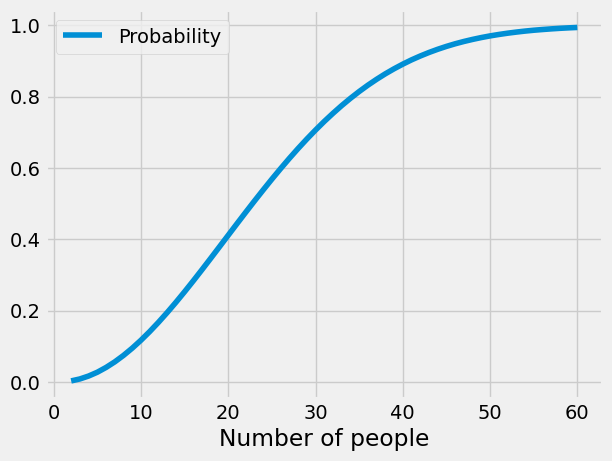

In [4]:
import matplotlib.pyplot as plots


plots.style.use('fivethirtyeight')


Birthday_probs.plot();

Are the above probabilities surprising? Can you provide an intuition for them?

Note that the number of people that yields the probability closest to a fair bet is 23:

In [5]:
birthday_prob(23)

0.5073